In [28]:
from utils import parse_arguments, read_settings, plot_rewards
import matplotlib.pyplot as plt
import gymnasium as gym
import torch
from tqdm import tqdm
from agent import DQNAgent, DoubleDQNAgent
import os
import collections
import numpy as np
from sklearn.model_selection import ParameterGrid

In [29]:
device = torch.device('cuda' if torch.cuda.is_available(
) else 'mps' if torch.backends.mps.is_available() else 'cpu')

In [30]:
def train_dqn(env: gym.Env, agent: DQNAgent, episodes: int):
    episode_rewards = []
    recent_rewards = collections.deque(maxlen=100)
    for episode in tqdm(range(episodes), desc="Training: "):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, next_state, reward, done)
            state = next_state
            total_reward += reward
            agent.replay()

        episode_rewards.append(total_reward)
        recent_rewards.append(total_reward)
        if (episode + 1) % 100 == 0:
            print(
                f"\rEpisode {episode + 1}/{episodes}\tAverage Score: {sum(recent_rewards) / len(recent_rewards):.2f}")
    return episode_rewards

In [31]:
print(f'{device = }')

train_settings = {'episodes': 2000}
print(f'{train_settings = }')

device = device(type='mps')
train_settings = {'episodes': 2000}


In [32]:
# Environment
env = gym.make('MountainCar-v0', render_mode='rgb_array')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
checkpoint_folder = 'checkpoints'
os.makedirs(checkpoint_folder, exist_ok=True)

In [39]:
# Agent
dqn_agent_settings = {'lr': [1e-3, 1e-4],
                      'gamma': [0.95, 0.99, 0.999],
                      'epsilon': [1.0],
                      'epsilon_min': [0.01],
                      'epsilon_decay': [0.99, 0.95, 0.9],
                      'batch_size': [64],
                      'hidden_units': [64],
                      }
dqn_params = ParameterGrid(dqn_agent_settings)
dqn_checkpoint_path = os.path.join(checkpoint_folder, 'DQNAgent.pth')

max_rewards = -np.inf
for param in tqdm(dqn_params):
    dqn_agent = DQNAgent(state_size, action_size, **param)
    print(param)

    dqn_rewards = train_dqn(env, dqn_agent, **train_settings)

    if x := np.mean(dqn_rewards) > max_rewards:
        max_rewards = x
        best_dqn_config = param
        dqn_agent.save_state(dqn_checkpoint_path)

{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:11<03:29,  9.08it/s]

Episode 100/2000	Average Score: -199.31


Training:  10%|█         | 201/2000 [00:21<03:11,  9.37it/s]

Episode 200/2000	Average Score: -199.61


Training:  15%|█▌        | 301/2000 [00:31<02:47, 10.13it/s]

Episode 300/2000	Average Score: -197.00


Training:  20%|██        | 402/2000 [00:41<02:27, 10.83it/s]

Episode 400/2000	Average Score: -191.01


Training:  25%|██▌       | 502/2000 [00:50<02:12, 11.28it/s]

Episode 500/2000	Average Score: -184.98


Training:  30%|███       | 600/2000 [01:00<02:18, 10.14it/s]

Episode 600/2000	Average Score: -186.35


Training:  35%|███▌      | 702/2000 [01:08<01:37, 13.36it/s]

Episode 700/2000	Average Score: -169.51


Training:  40%|████      | 802/2000 [01:16<01:27, 13.70it/s]

Episode 800/2000	Average Score: -155.81


Training:  45%|████▌     | 902/2000 [01:25<01:38, 11.15it/s]

Episode 900/2000	Average Score: -166.43


Training:  50%|█████     | 1002/2000 [01:34<01:20, 12.33it/s]

Episode 1000/2000	Average Score: -167.88


Training:  55%|█████▌    | 1102/2000 [01:42<01:27, 10.30it/s]

Episode 1100/2000	Average Score: -165.94


Training:  60%|██████    | 1202/2000 [01:51<01:07, 11.90it/s]

Episode 1200/2000	Average Score: -170.70


Training:  65%|██████▌   | 1301/2000 [02:00<01:19,  8.75it/s]

Episode 1300/2000	Average Score: -183.03


Training:  70%|███████   | 1401/2000 [02:11<01:07,  8.85it/s]

Episode 1400/2000	Average Score: -194.51


Training:  75%|███████▌  | 1500/2000 [02:20<00:47, 10.43it/s]

Episode 1500/2000	Average Score: -159.50


Training:  80%|████████  | 1601/2000 [02:30<00:38, 10.37it/s]

Episode 1600/2000	Average Score: -174.11


Training:  85%|████████▌ | 1701/2000 [02:39<00:23, 12.78it/s]

Episode 1700/2000	Average Score: -176.57


Training:  90%|█████████ | 1801/2000 [02:47<00:17, 11.50it/s]

Episode 1800/2000	Average Score: -164.69


Training:  95%|█████████▌| 1901/2000 [02:55<00:06, 14.28it/s]

Episode 1900/2000	Average Score: -162.62


Training: 100%|██████████| 2000/2000 [03:04<00:00, 10.82it/s]


Episode 2000/2000	Average Score: -184.28
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:09<03:28,  9.10it/s]

Episode 100/2000	Average Score: -197.73


Training:  10%|█         | 202/2000 [00:19<02:55, 10.27it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 300/2000 [00:29<02:40, 10.60it/s]

Episode 300/2000	Average Score: -194.93


Training:  20%|██        | 402/2000 [00:39<02:32, 10.50it/s]

Episode 400/2000	Average Score: -191.51


Training:  25%|██▌       | 500/2000 [00:49<02:26, 10.21it/s]

Episode 500/2000	Average Score: -197.48


Training:  30%|███       | 601/2000 [00:59<02:17, 10.15it/s]

Episode 600/2000	Average Score: -194.17


Training:  35%|███▌      | 701/2000 [01:09<02:11,  9.87it/s]

Episode 700/2000	Average Score: -181.47


Training:  40%|████      | 801/2000 [01:17<01:36, 12.42it/s]

Episode 800/2000	Average Score: -160.60


Training:  45%|████▌     | 901/2000 [01:25<01:31, 12.01it/s]

Episode 900/2000	Average Score: -152.98


Training:  50%|█████     | 1002/2000 [01:32<01:10, 14.13it/s]

Episode 1000/2000	Average Score: -148.85


Training:  55%|█████▌    | 1101/2000 [01:39<00:56, 15.90it/s]

Episode 1100/2000	Average Score: -136.31


Training:  60%|██████    | 1203/2000 [01:46<00:52, 15.12it/s]

Episode 1200/2000	Average Score: -139.10


Training:  65%|██████▌   | 1302/2000 [01:54<01:07, 10.34it/s]

Episode 1300/2000	Average Score: -161.10


Training:  70%|███████   | 1402/2000 [02:04<00:50, 11.94it/s]

Episode 1400/2000	Average Score: -185.99


Training:  75%|███████▌  | 1502/2000 [02:13<00:39, 12.62it/s]

Episode 1500/2000	Average Score: -157.40


Training:  80%|████████  | 1600/2000 [02:21<00:36, 11.08it/s]

Episode 1600/2000	Average Score: -160.71


Training:  85%|████████▌ | 1702/2000 [02:30<00:28, 10.61it/s]

Episode 1700/2000	Average Score: -193.25


Training:  90%|█████████ | 1800/2000 [02:39<00:18, 11.06it/s]

Episode 1800/2000	Average Score: -166.25


Training:  95%|█████████▌| 1901/2000 [02:48<00:10,  9.75it/s]

Episode 1900/2000	Average Score: -177.13


Training: 100%|██████████| 2000/2000 [02:57<00:00, 11.24it/s]


Episode 2000/2000	Average Score: -181.70
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 102/2000 [00:10<03:11,  9.91it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 201/2000 [00:20<03:01,  9.90it/s]

Episode 200/2000	Average Score: -194.11


Training:  15%|█▌        | 303/2000 [00:28<02:02, 13.82it/s]

Episode 300/2000	Average Score: -163.15


Training:  20%|██        | 401/2000 [00:35<01:52, 14.20it/s]

Episode 400/2000	Average Score: -133.75


Training:  25%|██▌       | 502/2000 [00:42<01:38, 15.19it/s]

Episode 500/2000	Average Score: -123.80


Training:  30%|███       | 602/2000 [00:48<01:33, 14.94it/s]

Episode 600/2000	Average Score: -129.81


Training:  35%|███▌      | 702/2000 [00:55<01:46, 12.15it/s]

Episode 700/2000	Average Score: -133.77


Training:  40%|████      | 802/2000 [01:02<01:25, 14.02it/s]

Episode 800/2000	Average Score: -137.30


Training:  45%|████▌     | 902/2000 [01:09<01:14, 14.67it/s]

Episode 900/2000	Average Score: -133.54


Training:  50%|█████     | 1002/2000 [01:16<01:01, 16.27it/s]

Episode 1000/2000	Average Score: -129.85


Training:  55%|█████▌    | 1102/2000 [01:22<00:54, 16.60it/s]

Episode 1100/2000	Average Score: -126.54


Training:  60%|██████    | 1202/2000 [01:29<00:53, 14.88it/s]

Episode 1200/2000	Average Score: -121.96


Training:  65%|██████▌   | 1301/2000 [01:35<00:53, 13.18it/s]

Episode 1300/2000	Average Score: -121.55


Training:  70%|███████   | 1402/2000 [01:41<00:38, 15.58it/s]

Episode 1400/2000	Average Score: -116.29


Training:  75%|███████▌  | 1504/2000 [01:47<00:25, 19.15it/s]

Episode 1500/2000	Average Score: -120.71


Training:  80%|████████  | 1602/2000 [01:54<00:25, 15.75it/s]

Episode 1600/2000	Average Score: -139.82


Training:  85%|████████▌ | 1703/2000 [02:01<00:18, 16.20it/s]

Episode 1700/2000	Average Score: -124.79


Training:  90%|█████████ | 1802/2000 [02:06<00:11, 17.29it/s]

Episode 1800/2000	Average Score: -118.89


Training:  95%|█████████▌| 1902/2000 [02:13<00:05, 17.90it/s]

Episode 1900/2000	Average Score: -124.02


Training: 100%|██████████| 2000/2000 [02:19<00:00, 14.38it/s]


Episode 2000/2000	Average Score: -114.66
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 102/2000 [00:09<03:05, 10.26it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 202/2000 [00:19<02:56, 10.18it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 301/2000 [00:29<02:40, 10.55it/s]

Episode 300/2000	Average Score: -200.00


Training:  20%|██        | 402/2000 [00:39<02:28, 10.76it/s]

Episode 400/2000	Average Score: -195.64


Training:  25%|██▌       | 502/2000 [00:49<02:24, 10.37it/s]

Episode 500/2000	Average Score: -199.87


Training:  30%|███       | 602/2000 [00:59<02:14, 10.39it/s]

Episode 600/2000	Average Score: -200.00


Training:  35%|███▌      | 702/2000 [01:08<02:07, 10.17it/s]

Episode 700/2000	Average Score: -200.00


Training:  40%|████      | 802/2000 [01:18<01:56, 10.28it/s]

Episode 800/2000	Average Score: -200.00


Training:  45%|████▌     | 902/2000 [01:28<01:45, 10.37it/s]

Episode 900/2000	Average Score: -200.00


Training:  50%|█████     | 1000/2000 [01:37<01:32, 10.76it/s]

Episode 1000/2000	Average Score: -200.00


Training:  55%|█████▌    | 1101/2000 [01:47<01:27, 10.28it/s]

Episode 1100/2000	Average Score: -200.00


Training:  60%|██████    | 1201/2000 [01:57<01:17, 10.36it/s]

Episode 1200/2000	Average Score: -200.00


Training:  65%|██████▌   | 1301/2000 [02:07<01:08, 10.23it/s]

Episode 1300/2000	Average Score: -200.00


Training:  70%|███████   | 1401/2000 [02:17<00:57, 10.40it/s]

Episode 1400/2000	Average Score: -200.00


Training:  75%|███████▌  | 1501/2000 [02:26<00:49, 10.09it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1601/2000 [02:36<00:39, 10.19it/s]

Episode 1600/2000	Average Score: -200.00


Training:  85%|████████▌ | 1701/2000 [02:46<00:30,  9.96it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1800/2000 [02:57<00:20,  9.74it/s]

Episode 1800/2000	Average Score: -200.00


Training:  95%|█████████▌| 1901/2000 [03:07<00:09, 10.11it/s]

Episode 1900/2000	Average Score: -200.00


Training: 100%|██████████| 2000/2000 [03:16<00:00, 10.16it/s]


Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:09<03:02, 10.41it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 201/2000 [00:19<03:12,  9.35it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 302/2000 [00:29<02:39, 10.66it/s]

Episode 300/2000	Average Score: -197.51


Training:  20%|██        | 401/2000 [00:38<02:34, 10.35it/s]

Episode 400/2000	Average Score: -171.81


Training:  25%|██▌       | 502/2000 [00:46<01:26, 17.32it/s]

Episode 500/2000	Average Score: -141.07


Training:  30%|███       | 601/2000 [00:52<01:22, 16.86it/s]

Episode 600/2000	Average Score: -129.23


Training:  35%|███▌      | 703/2000 [01:01<01:32, 13.95it/s]

Episode 700/2000	Average Score: -175.77


Training:  40%|████      | 803/2000 [01:10<01:21, 14.67it/s]

Episode 800/2000	Average Score: -144.90


Training:  45%|████▌     | 901/2000 [01:20<01:51,  9.89it/s]

Episode 900/2000	Average Score: -191.59


Training:  50%|█████     | 1001/2000 [01:31<01:45,  9.44it/s]

Episode 1000/2000	Average Score: -200.00


Training:  55%|█████▌    | 1101/2000 [01:42<01:46,  8.42it/s]

Episode 1100/2000	Average Score: -200.00


Training:  60%|██████    | 1200/2000 [01:53<01:28,  9.08it/s]

Episode 1200/2000	Average Score: -200.00


Training:  65%|██████▌   | 1302/2000 [02:05<01:14,  9.42it/s]

Episode 1300/2000	Average Score: -200.00


Training:  70%|███████   | 1402/2000 [02:16<00:58, 10.26it/s]

Episode 1400/2000	Average Score: -196.32


Training:  75%|███████▌  | 1501/2000 [02:25<00:52,  9.46it/s]

Episode 1500/2000	Average Score: -184.13


Training:  80%|████████  | 1601/2000 [02:35<00:44,  8.92it/s]

Episode 1600/2000	Average Score: -200.00


Training:  85%|████████▌ | 1701/2000 [02:47<00:33,  8.88it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1800/2000 [02:57<00:19, 10.19it/s]

Episode 1800/2000	Average Score: -198.70


Training:  95%|█████████▌| 1901/2000 [03:08<00:11,  8.38it/s]

Episode 1900/2000	Average Score: -199.33


Training: 100%|██████████| 2000/2000 [03:18<00:00, 10.10it/s]


Episode 2000/2000	Average Score: -189.88
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:10<03:09, 10.01it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 201/2000 [00:21<03:45,  7.99it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 301/2000 [00:32<02:55,  9.70it/s]

Episode 300/2000	Average Score: -200.00


Training:  20%|██        | 401/2000 [00:43<02:46,  9.61it/s]

Episode 400/2000	Average Score: -199.45


Training:  25%|██▌       | 501/2000 [00:54<02:27, 10.16it/s]

Episode 500/2000	Average Score: -199.70


Training:  30%|███       | 601/2000 [01:06<02:32,  9.17it/s]

Episode 600/2000	Average Score: -200.00


Training:  35%|███▌      | 701/2000 [01:16<02:07, 10.16it/s]

Episode 700/2000	Average Score: -200.00


Training:  40%|████      | 801/2000 [01:27<02:14,  8.89it/s]

Episode 800/2000	Average Score: -200.00


Training:  45%|████▌     | 902/2000 [01:38<01:45, 10.39it/s]

Episode 900/2000	Average Score: -200.00


Training:  50%|█████     | 1002/2000 [01:48<01:40,  9.89it/s]

Episode 1000/2000	Average Score: -200.00


Training:  55%|█████▌    | 1100/2000 [01:58<01:30,  9.93it/s]

Episode 1100/2000	Average Score: -200.00


Training:  60%|██████    | 1201/2000 [02:08<01:21,  9.82it/s]

Episode 1200/2000	Average Score: -200.00


Training:  65%|██████▌   | 1301/2000 [02:19<01:15,  9.30it/s]

Episode 1300/2000	Average Score: -200.00


Training:  70%|███████   | 1401/2000 [02:29<01:01,  9.76it/s]

Episode 1400/2000	Average Score: -200.00


Training:  75%|███████▌  | 1502/2000 [02:40<00:49, 10.09it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1601/2000 [02:50<00:38, 10.37it/s]

Episode 1600/2000	Average Score: -200.00


Training:  85%|████████▌ | 1701/2000 [03:01<00:34,  8.75it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1801/2000 [03:12<00:22,  8.76it/s]

Episode 1800/2000	Average Score: -200.00


Training:  95%|█████████▌| 1901/2000 [03:23<00:12,  7.62it/s]

Episode 1900/2000	Average Score: -200.00


Training: 100%|██████████| 2000/2000 [03:34<00:00,  9.31it/s]


Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:11<03:31,  8.99it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 201/2000 [00:23<03:18,  9.08it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 301/2000 [00:33<02:51,  9.89it/s]

Episode 300/2000	Average Score: -200.00


Training:  20%|██        | 402/2000 [00:43<02:23, 11.11it/s]

Episode 400/2000	Average Score: -196.19


Training:  25%|██▌       | 501/2000 [00:53<02:34,  9.71it/s]

Episode 500/2000	Average Score: -183.20


Training:  30%|███       | 601/2000 [01:03<02:24,  9.67it/s]

Episode 600/2000	Average Score: -194.43


Training:  35%|███▌      | 702/2000 [01:13<01:53, 11.42it/s]

Episode 700/2000	Average Score: -190.36


Training:  40%|████      | 802/2000 [01:22<01:29, 13.40it/s]

Episode 800/2000	Average Score: -185.67


Training:  45%|████▌     | 901/2000 [01:32<01:52,  9.76it/s]

Episode 900/2000	Average Score: -178.58


Training:  50%|█████     | 1002/2000 [01:41<01:19, 12.61it/s]

Episode 1000/2000	Average Score: -164.68


Training:  55%|█████▌    | 1102/2000 [01:49<01:15, 11.91it/s]

Episode 1100/2000	Average Score: -147.15


Training:  60%|██████    | 1201/2000 [01:59<01:22,  9.74it/s]

Episode 1200/2000	Average Score: -186.83


Training:  65%|██████▌   | 1301/2000 [02:09<01:04, 10.80it/s]

Episode 1300/2000	Average Score: -190.44


Training:  70%|███████   | 1401/2000 [02:18<00:45, 13.08it/s]

Episode 1400/2000	Average Score: -158.30


Training:  75%|███████▌  | 1501/2000 [02:27<00:46, 10.72it/s]

Episode 1500/2000	Average Score: -172.69


Training:  80%|████████  | 1601/2000 [02:36<00:31, 12.48it/s]

Episode 1600/2000	Average Score: -170.78


Training:  85%|████████▌ | 1701/2000 [02:44<00:24, 12.25it/s]

Episode 1700/2000	Average Score: -161.14


Training:  90%|█████████ | 1802/2000 [02:53<00:18, 10.59it/s]

Episode 1800/2000	Average Score: -178.86


Training:  95%|█████████▌| 1902/2000 [03:03<00:08, 11.31it/s]

Episode 1900/2000	Average Score: -179.63


Training: 100%|██████████| 2000/2000 [03:12<00:00, 10.40it/s]


Episode 2000/2000	Average Score: -168.05
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:11<03:23,  9.33it/s]

Episode 100/2000	Average Score: -198.94


Training:  10%|█         | 201/2000 [00:21<03:02,  9.87it/s]

Episode 200/2000	Average Score: -198.73


Training:  15%|█▌        | 301/2000 [00:32<02:50,  9.98it/s]

Episode 300/2000	Average Score: -200.00


Training:  20%|██        | 400/2000 [00:42<02:37, 10.18it/s]

Episode 400/2000	Average Score: -200.00


Training:  25%|██▌       | 502/2000 [00:52<02:35,  9.62it/s]

Episode 500/2000	Average Score: -200.00


Training:  30%|███       | 601/2000 [01:02<02:17, 10.16it/s]

Episode 600/2000	Average Score: -199.39


Training:  35%|███▌      | 701/2000 [01:12<02:06, 10.31it/s]

Episode 700/2000	Average Score: -198.89


Training:  40%|████      | 801/2000 [01:23<02:04,  9.60it/s]

Episode 800/2000	Average Score: -200.00


Training:  45%|████▌     | 901/2000 [01:32<01:43, 10.63it/s]

Episode 900/2000	Average Score: -199.37


Training:  50%|█████     | 1002/2000 [01:42<01:37, 10.23it/s]

Episode 1000/2000	Average Score: -198.15


Training:  55%|█████▌    | 1102/2000 [01:52<01:25, 10.54it/s]

Episode 1100/2000	Average Score: -198.69


Training:  60%|██████    | 1202/2000 [02:02<01:10, 11.28it/s]

Episode 1200/2000	Average Score: -194.32


Training:  65%|██████▌   | 1301/2000 [02:11<01:09, 10.05it/s]

Episode 1300/2000	Average Score: -191.99


Training:  70%|███████   | 1402/2000 [02:21<00:56, 10.60it/s]

Episode 1400/2000	Average Score: -197.90


Training:  75%|███████▌  | 1502/2000 [02:30<00:44, 11.25it/s]

Episode 1500/2000	Average Score: -179.16


Training:  80%|████████  | 1600/2000 [02:39<00:36, 10.89it/s]

Episode 1600/2000	Average Score: -186.64


Training:  85%|████████▌ | 1701/2000 [02:48<00:24, 12.07it/s]

Episode 1700/2000	Average Score: -169.37


Training:  90%|█████████ | 1801/2000 [02:56<00:16, 12.17it/s]

Episode 1800/2000	Average Score: -165.60


Training:  95%|█████████▌| 1901/2000 [03:03<00:06, 14.69it/s]

Episode 1900/2000	Average Score: -151.55


Training: 100%|██████████| 2000/2000 [03:11<00:00, 10.44it/s]


Episode 2000/2000	Average Score: -152.08
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:09<03:10,  9.95it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 201/2000 [00:18<02:28, 12.09it/s]

Episode 200/2000	Average Score: -185.67


Training:  15%|█▌        | 302/2000 [00:26<02:16, 12.40it/s]

Episode 300/2000	Average Score: -160.03


Training:  20%|██        | 403/2000 [00:33<01:34, 16.90it/s]

Episode 400/2000	Average Score: -136.87


Training:  25%|██▌       | 503/2000 [00:39<01:41, 14.78it/s]

Episode 500/2000	Average Score: -131.24


Training:  30%|███       | 602/2000 [00:46<01:18, 17.78it/s]

Episode 600/2000	Average Score: -129.31


Training:  35%|███▌      | 703/2000 [00:52<01:13, 17.58it/s]

Episode 700/2000	Average Score: -131.94


Training:  40%|████      | 801/2000 [00:59<01:53, 10.56it/s]

Episode 800/2000	Average Score: -135.42


Training:  45%|████▌     | 903/2000 [01:06<01:02, 17.42it/s]

Episode 900/2000	Average Score: -126.11


Training:  50%|█████     | 1002/2000 [01:12<01:05, 15.26it/s]

Episode 1000/2000	Average Score: -122.76


Training:  55%|█████▌    | 1102/2000 [01:18<00:55, 16.31it/s]

Episode 1100/2000	Average Score: -132.10


Training:  60%|██████    | 1202/2000 [01:25<01:05, 12.13it/s]

Episode 1200/2000	Average Score: -129.93


Training:  65%|██████▌   | 1301/2000 [01:32<00:42, 16.57it/s]

Episode 1300/2000	Average Score: -130.08


Training:  70%|███████   | 1402/2000 [01:39<00:34, 17.59it/s]

Episode 1400/2000	Average Score: -118.28


Training:  75%|███████▌  | 1502/2000 [01:45<00:37, 13.44it/s]

Episode 1500/2000	Average Score: -124.95


Training:  80%|████████  | 1602/2000 [01:51<00:22, 18.09it/s]

Episode 1600/2000	Average Score: -120.29


Training:  85%|████████▌ | 1702/2000 [01:57<00:17, 16.68it/s]

Episode 1700/2000	Average Score: -126.91


Training:  90%|█████████ | 1801/2000 [02:04<00:17, 11.57it/s]

Episode 1800/2000	Average Score: -136.94


Training:  95%|█████████▌| 1901/2000 [02:11<00:07, 13.38it/s]

Episode 1900/2000	Average Score: -137.02


Training: 100%|██████████| 2000/2000 [02:18<00:00, 14.41it/s]


Episode 2000/2000	Average Score: -149.30
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:10<03:13,  9.80it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 200/2000 [00:20<02:56, 10.20it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 302/2000 [00:30<02:48, 10.10it/s]

Episode 300/2000	Average Score: -196.36


Training:  20%|██        | 402/2000 [00:40<02:34, 10.38it/s]

Episode 400/2000	Average Score: -199.69


Training:  25%|██▌       | 501/2000 [00:49<02:34,  9.68it/s]

Episode 500/2000	Average Score: -200.00


Training:  30%|███       | 602/2000 [01:00<02:17, 10.18it/s]

Episode 600/2000	Average Score: -200.00


Training:  35%|███▌      | 702/2000 [01:11<02:20,  9.24it/s]

Episode 700/2000	Average Score: -200.00


Training:  40%|████      | 801/2000 [01:21<02:01,  9.85it/s]

Episode 800/2000	Average Score: -200.00


Training:  45%|████▌     | 901/2000 [01:32<02:23,  7.66it/s]

Episode 900/2000	Average Score: -200.00


Training:  50%|█████     | 1000/2000 [01:42<01:45,  9.45it/s]

Episode 1000/2000	Average Score: -200.00


Training:  55%|█████▌    | 1101/2000 [01:53<01:35,  9.45it/s]

Episode 1100/2000	Average Score: -194.88


Training:  60%|██████    | 1201/2000 [02:04<01:21,  9.86it/s]

Episode 1200/2000	Average Score: -200.00


Training:  65%|██████▌   | 1302/2000 [02:14<01:08, 10.21it/s]

Episode 1300/2000	Average Score: -200.00


Training:  70%|███████   | 1402/2000 [02:24<01:00,  9.91it/s]

Episode 1400/2000	Average Score: -198.50


Training:  75%|███████▌  | 1501/2000 [02:35<00:58,  8.48it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1601/2000 [02:45<00:38, 10.28it/s]

Episode 1600/2000	Average Score: -200.00


Training:  85%|████████▌ | 1701/2000 [02:55<00:31,  9.51it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1801/2000 [03:06<00:21,  9.26it/s]

Episode 1800/2000	Average Score: -198.45


Training:  95%|█████████▌| 1901/2000 [03:16<00:09,  9.93it/s]

Episode 1900/2000	Average Score: -199.13


Training: 100%|██████████| 2000/2000 [03:26<00:00,  9.70it/s]


Episode 2000/2000	Average Score: -196.82
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 102/2000 [00:10<03:05, 10.23it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 202/2000 [00:21<02:59, 10.02it/s]

Episode 200/2000	Average Score: -193.66


Training:  15%|█▌        | 301/2000 [00:29<02:13, 12.70it/s]

Episode 300/2000	Average Score: -149.22


Training:  20%|██        | 403/2000 [00:36<02:05, 12.77it/s]

Episode 400/2000	Average Score: -140.97


Training:  25%|██▌       | 502/2000 [00:43<01:49, 13.66it/s]

Episode 500/2000	Average Score: -136.98


Training:  30%|███       | 603/2000 [00:50<01:32, 15.07it/s]

Episode 600/2000	Average Score: -134.15


Training:  35%|███▌      | 702/2000 [00:57<01:42, 12.60it/s]

Episode 700/2000	Average Score: -136.98


Training:  40%|████      | 803/2000 [01:04<01:13, 16.19it/s]

Episode 800/2000	Average Score: -141.12


Training:  45%|████▌     | 901/2000 [01:11<01:11, 15.28it/s]

Episode 900/2000	Average Score: -130.44


Training:  50%|█████     | 1002/2000 [01:18<01:08, 14.51it/s]

Episode 1000/2000	Average Score: -134.08


Training:  55%|█████▌    | 1101/2000 [01:27<01:50,  8.15it/s]

Episode 1100/2000	Average Score: -158.14


Training:  60%|██████    | 1201/2000 [01:39<01:27,  9.11it/s]

Episode 1200/2000	Average Score: -200.00


Training:  65%|██████▌   | 1301/2000 [01:50<01:28,  7.90it/s]

Episode 1300/2000	Average Score: -200.00


Training:  70%|███████   | 1401/2000 [02:00<01:05,  9.14it/s]

Episode 1400/2000	Average Score: -200.00


Training:  75%|███████▌  | 1501/2000 [02:11<00:53,  9.30it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1601/2000 [02:23<00:41,  9.56it/s]

Episode 1600/2000	Average Score: -199.94


Training:  85%|████████▌ | 1701/2000 [02:33<00:27, 10.94it/s]

Episode 1700/2000	Average Score: -176.96


Training:  90%|█████████ | 1802/2000 [02:40<00:13, 15.02it/s]

Episode 1800/2000	Average Score: -134.38


Training:  95%|█████████▌| 1901/2000 [02:48<00:10,  9.19it/s]

Episode 1900/2000	Average Score: -155.61


Training: 100%|██████████| 2000/2000 [02:59<00:00, 11.15it/s]


Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:10<03:07, 10.15it/s]

Episode 100/2000	Average Score: -196.71


Training:  10%|█         | 200/2000 [00:20<04:12,  7.12it/s]

Episode 200/2000	Average Score: -197.94


Training:  15%|█▌        | 301/2000 [00:30<03:02,  9.29it/s]

Episode 300/2000	Average Score: -194.48


Training:  20%|██        | 401/2000 [00:41<02:44,  9.74it/s]

Episode 400/2000	Average Score: -199.34


Training:  25%|██▌       | 501/2000 [00:51<02:30,  9.94it/s]

Episode 500/2000	Average Score: -198.49


Training:  30%|███       | 601/2000 [01:01<02:19, 10.02it/s]

Episode 600/2000	Average Score: -200.00


Training:  35%|███▌      | 701/2000 [01:12<02:10,  9.95it/s]

Episode 700/2000	Average Score: -200.00


Training:  40%|████      | 802/2000 [01:22<01:58, 10.14it/s]

Episode 800/2000	Average Score: -200.00


Training:  45%|████▌     | 902/2000 [01:32<01:46, 10.30it/s]

Episode 900/2000	Average Score: -200.00


Training:  50%|█████     | 1002/2000 [01:42<01:40,  9.93it/s]

Episode 1000/2000	Average Score: -200.00


Training:  55%|█████▌    | 1102/2000 [01:53<01:33,  9.62it/s]

Episode 1100/2000	Average Score: -200.00


Training:  60%|██████    | 1201/2000 [02:03<01:22,  9.66it/s]

Episode 1200/2000	Average Score: -199.99


Training:  65%|██████▌   | 1301/2000 [02:13<01:10,  9.94it/s]

Episode 1300/2000	Average Score: -199.92


Training:  70%|███████   | 1402/2000 [02:24<00:57, 10.32it/s]

Episode 1400/2000	Average Score: -199.59


Training:  75%|███████▌  | 1502/2000 [02:34<00:51,  9.72it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1601/2000 [02:44<00:40,  9.93it/s]

Episode 1600/2000	Average Score: -200.00


Training:  85%|████████▌ | 1701/2000 [02:54<00:31,  9.51it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1802/2000 [03:04<00:19, 10.20it/s]

Episode 1800/2000	Average Score: -200.00


Training:  95%|█████████▌| 1902/2000 [03:14<00:09, 10.13it/s]

Episode 1900/2000	Average Score: -200.00


Training: 100%|██████████| 2000/2000 [03:24<00:00,  9.80it/s]


Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:10<03:07, 10.15it/s]

Episode 100/2000	Average Score: -198.15


Training:  10%|█         | 201/2000 [00:20<02:43, 11.03it/s]

Episode 200/2000	Average Score: -191.39


Training:  15%|█▌        | 301/2000 [00:29<02:57,  9.60it/s]

Episode 300/2000	Average Score: -185.19


Training:  20%|██        | 402/2000 [00:38<02:19, 11.45it/s]

Episode 400/2000	Average Score: -182.30


Training:  25%|██▌       | 502/2000 [00:48<02:05, 11.91it/s]

Episode 500/2000	Average Score: -180.77


Training:  30%|███       | 601/2000 [00:57<02:17, 10.17it/s]

Episode 600/2000	Average Score: -190.92


Training:  35%|███▌      | 701/2000 [01:07<02:00, 10.77it/s]

Episode 700/2000	Average Score: -185.98


Training:  40%|████      | 801/2000 [01:16<01:39, 11.99it/s]

Episode 800/2000	Average Score: -178.82


Training:  45%|████▌     | 901/2000 [01:25<01:36, 11.43it/s]

Episode 900/2000	Average Score: -174.70


Training:  50%|█████     | 1001/2000 [01:34<01:24, 11.79it/s]

Episode 1000/2000	Average Score: -177.29


Training:  55%|█████▌    | 1101/2000 [01:42<01:22, 10.95it/s]

Episode 1100/2000	Average Score: -171.08


Training:  60%|██████    | 1201/2000 [01:51<01:15, 10.59it/s]

Episode 1200/2000	Average Score: -171.03


Training:  65%|██████▌   | 1301/2000 [02:00<01:01, 11.37it/s]

Episode 1300/2000	Average Score: -174.65


Training:  70%|███████   | 1401/2000 [02:09<00:54, 10.93it/s]

Episode 1400/2000	Average Score: -177.09


Training:  75%|███████▌  | 1501/2000 [02:18<00:40, 12.19it/s]

Episode 1500/2000	Average Score: -172.81


Training:  80%|████████  | 1601/2000 [02:25<00:28, 13.76it/s]

Episode 1600/2000	Average Score: -153.77


Training:  85%|████████▌ | 1701/2000 [02:33<00:21, 13.83it/s]

Episode 1700/2000	Average Score: -157.56


Training:  90%|█████████ | 1801/2000 [02:41<00:15, 12.61it/s]

Episode 1800/2000	Average Score: -150.08


Training:  95%|█████████▌| 1901/2000 [02:48<00:06, 14.77it/s]

Episode 1900/2000	Average Score: -141.58


Training: 100%|██████████| 2000/2000 [02:55<00:00, 11.37it/s]


Episode 2000/2000	Average Score: -149.94
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:10<03:11,  9.91it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 202/2000 [00:20<02:51, 10.46it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 301/2000 [00:30<02:49, 10.01it/s]

Episode 300/2000	Average Score: -200.00


Training:  20%|██        | 401/2000 [00:40<02:40,  9.96it/s]

Episode 400/2000	Average Score: -200.00


Training:  25%|██▌       | 501/2000 [00:49<02:26, 10.20it/s]

Episode 500/2000	Average Score: -194.75


Training:  30%|███       | 601/2000 [01:00<03:16,  7.11it/s]

Episode 600/2000	Average Score: -199.62


Training:  35%|███▌      | 701/2000 [01:11<02:14,  9.67it/s]

Episode 700/2000	Average Score: -196.94


Training:  40%|████      | 801/2000 [01:22<02:12,  9.07it/s]

Episode 800/2000	Average Score: -196.82


Training:  45%|████▌     | 901/2000 [01:33<02:03,  8.87it/s]

Episode 900/2000	Average Score: -200.00


Training:  50%|█████     | 1002/2000 [01:42<01:35, 10.47it/s]

Episode 1000/2000	Average Score: -195.50


Training:  55%|█████▌    | 1102/2000 [01:53<01:24, 10.64it/s]

Episode 1100/2000	Average Score: -197.02


Training:  60%|██████    | 1201/2000 [02:04<01:24,  9.51it/s]

Episode 1200/2000	Average Score: -198.49


Training:  65%|██████▌   | 1301/2000 [02:15<01:19,  8.78it/s]

Episode 1300/2000	Average Score: -192.77


Training:  70%|███████   | 1401/2000 [02:25<01:04,  9.29it/s]

Episode 1400/2000	Average Score: -195.76


Training:  75%|███████▌  | 1501/2000 [02:37<00:56,  8.87it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1601/2000 [02:49<00:43,  9.08it/s]

Episode 1600/2000	Average Score: -198.45


Training:  85%|████████▌ | 1701/2000 [02:59<00:31,  9.49it/s]

Episode 1700/2000	Average Score: -192.11


Training:  90%|█████████ | 1801/2000 [03:10<00:20,  9.60it/s]

Episode 1800/2000	Average Score: -192.68


Training:  95%|█████████▌| 1902/2000 [03:20<00:08, 11.00it/s]

Episode 1900/2000	Average Score: -195.65


Training: 100%|██████████| 2000/2000 [03:30<00:00,  9.49it/s]


Episode 2000/2000	Average Score: -195.29
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:10<03:06, 10.18it/s]

Episode 100/2000	Average Score: -199.67


Training:  10%|█         | 202/2000 [00:19<02:14, 13.40it/s]

Episode 200/2000	Average Score: -179.10


Training:  15%|█▌        | 302/2000 [00:26<02:03, 13.77it/s]

Episode 300/2000	Average Score: -138.35


Training:  20%|██        | 402/2000 [00:33<01:54, 14.01it/s]

Episode 400/2000	Average Score: -132.99


Training:  25%|██▌       | 501/2000 [00:40<01:26, 17.23it/s]

Episode 500/2000	Average Score: -129.23


Training:  30%|███       | 602/2000 [00:47<02:09, 10.79it/s]

Episode 600/2000	Average Score: -149.21


Training:  35%|███▌      | 702/2000 [00:56<01:34, 13.67it/s]

Episode 700/2000	Average Score: -155.43


Training:  40%|████      | 802/2000 [01:03<01:40, 11.97it/s]

Episode 800/2000	Average Score: -137.74


Training:  45%|████▌     | 901/2000 [01:10<01:37, 11.29it/s]

Episode 900/2000	Average Score: -142.92


Training:  50%|█████     | 1002/2000 [01:18<01:09, 14.46it/s]

Episode 1000/2000	Average Score: -143.24


Training:  55%|█████▌    | 1101/2000 [01:26<01:08, 13.14it/s]

Episode 1100/2000	Average Score: -141.20


Training:  60%|██████    | 1202/2000 [01:33<00:56, 14.13it/s]

Episode 1200/2000	Average Score: -138.44


Training:  65%|██████▌   | 1303/2000 [01:41<00:45, 15.46it/s]

Episode 1300/2000	Average Score: -142.04


Training:  70%|███████   | 1401/2000 [01:47<00:48, 12.25it/s]

Episode 1400/2000	Average Score: -124.20


Training:  75%|███████▌  | 1503/2000 [01:54<00:38, 13.03it/s]

Episode 1500/2000	Average Score: -122.99


Training:  80%|████████  | 1602/2000 [02:00<00:25, 15.91it/s]

Episode 1600/2000	Average Score: -123.42


Training:  85%|████████▌ | 1701/2000 [02:07<00:21, 13.80it/s]

Episode 1700/2000	Average Score: -125.16


Training:  90%|█████████ | 1801/2000 [02:14<00:12, 15.60it/s]

Episode 1800/2000	Average Score: -119.34


Training:  95%|█████████▌| 1901/2000 [02:20<00:06, 14.26it/s]

Episode 1900/2000	Average Score: -125.87


Training: 100%|██████████| 2000/2000 [02:27<00:00, 13.56it/s]


Episode 2000/2000	Average Score: -129.64
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:11<03:14,  9.76it/s]

Episode 100/2000	Average Score: -196.08


Training:  10%|█         | 201/2000 [00:22<03:11,  9.39it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 301/2000 [00:32<02:57,  9.55it/s]

Episode 300/2000	Average Score: -200.00


Training:  20%|██        | 400/2000 [00:44<02:37, 10.14it/s]

Episode 400/2000	Average Score: -200.00


Training:  25%|██▌       | 501/2000 [00:54<02:29, 10.04it/s]

Episode 500/2000	Average Score: -200.00


Training:  30%|███       | 601/2000 [01:04<02:16, 10.26it/s]

Episode 600/2000	Average Score: -200.00


Training:  35%|███▌      | 701/2000 [01:14<02:30,  8.62it/s]

Episode 700/2000	Average Score: -200.00


Training:  40%|████      | 800/2000 [01:25<01:58, 10.16it/s]

Episode 800/2000	Average Score: -200.00


Training:  45%|████▌     | 902/2000 [01:35<01:51,  9.83it/s]

Episode 900/2000	Average Score: -200.00


Training:  50%|█████     | 1000/2000 [01:45<01:36, 10.32it/s]

Episode 1000/2000	Average Score: -200.00


Training:  55%|█████▌    | 1102/2000 [01:55<01:23, 10.74it/s]

Episode 1100/2000	Average Score: -200.00


Training:  60%|██████    | 1201/2000 [02:05<01:23,  9.57it/s]

Episode 1200/2000	Average Score: -200.00


Training:  65%|██████▌   | 1302/2000 [02:16<01:07, 10.31it/s]

Episode 1300/2000	Average Score: -200.00


Training:  70%|███████   | 1401/2000 [02:25<01:03,  9.41it/s]

Episode 1400/2000	Average Score: -200.00


Training:  75%|███████▌  | 1500/2000 [02:35<00:49, 10.01it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1602/2000 [02:45<00:39,  9.99it/s]

Episode 1600/2000	Average Score: -200.00


Training:  85%|████████▌ | 1701/2000 [02:55<00:29, 10.08it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1801/2000 [03:05<00:19, 10.38it/s]

Episode 1800/2000	Average Score: -200.00


Training:  95%|█████████▌| 1901/2000 [03:14<00:09, 10.34it/s]

Episode 1900/2000	Average Score: -200.00


Training: 100%|██████████| 2000/2000 [03:24<00:00,  9.77it/s]


Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 102/2000 [00:09<02:53, 10.93it/s]

Episode 100/2000	Average Score: -194.43


Training:  10%|█         | 203/2000 [00:17<02:13, 13.41it/s]

Episode 200/2000	Average Score: -157.07


Training:  15%|█▌        | 301/2000 [00:24<02:23, 11.87it/s]

Episode 300/2000	Average Score: -140.40


Training:  20%|██        | 401/2000 [00:31<01:53, 14.11it/s]

Episode 400/2000	Average Score: -140.23


Training:  25%|██▌       | 504/2000 [00:37<01:20, 18.50it/s]

Episode 500/2000	Average Score: -132.76


Training:  30%|███       | 601/2000 [00:44<01:37, 14.38it/s]

Episode 600/2000	Average Score: -134.87


Training:  35%|███▌      | 702/2000 [00:51<01:31, 14.11it/s]

Episode 700/2000	Average Score: -147.22


Training:  40%|████      | 803/2000 [00:58<01:14, 16.11it/s]

Episode 800/2000	Average Score: -148.26


Training:  45%|████▌     | 901/2000 [01:05<01:30, 12.08it/s]

Episode 900/2000	Average Score: -131.67


Training:  50%|█████     | 1002/2000 [01:11<01:11, 13.93it/s]

Episode 1000/2000	Average Score: -132.10


Training:  55%|█████▌    | 1103/2000 [01:18<00:59, 14.97it/s]

Episode 1100/2000	Average Score: -133.20


Training:  60%|██████    | 1202/2000 [01:24<00:53, 14.96it/s]

Episode 1200/2000	Average Score: -130.00


Training:  65%|██████▌   | 1301/2000 [01:34<01:06, 10.55it/s]

Episode 1300/2000	Average Score: -193.67


Training:  70%|███████   | 1402/2000 [01:44<00:57, 10.47it/s]

Episode 1400/2000	Average Score: -200.00


Training:  75%|███████▌  | 1501/2000 [01:53<00:48, 10.34it/s]

Episode 1500/2000	Average Score: -198.92


Training:  80%|████████  | 1601/2000 [02:03<00:38, 10.32it/s]

Episode 1600/2000	Average Score: -191.63


Training:  85%|████████▌ | 1701/2000 [02:12<00:30,  9.77it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1801/2000 [02:22<00:19, 10.27it/s]

Episode 1800/2000	Average Score: -200.00


Training:  95%|█████████▌| 1901/2000 [02:32<00:09, 10.39it/s]

Episode 1900/2000	Average Score: -200.00


Training: 100%|██████████| 2000/2000 [02:42<00:00, 12.34it/s]


Episode 2000/2000	Average Score: -199.91
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:10<03:15,  9.72it/s]

Episode 100/2000	Average Score: -197.01


Training:  10%|█         | 201/2000 [00:21<03:10,  9.46it/s]

Episode 200/2000	Average Score: -197.74


Training:  15%|█▌        | 301/2000 [00:31<03:02,  9.31it/s]

Episode 300/2000	Average Score: -194.54


Training:  20%|██        | 401/2000 [00:41<02:45,  9.64it/s]

Episode 400/2000	Average Score: -196.52


Training:  25%|██▌       | 501/2000 [00:52<02:37,  9.53it/s]

Episode 500/2000	Average Score: -200.00


Training:  30%|███       | 601/2000 [01:02<02:35,  8.98it/s]

Episode 600/2000	Average Score: -198.12


Training:  35%|███▌      | 701/2000 [01:14<03:02,  7.11it/s]

Episode 700/2000	Average Score: -199.84


Training:  40%|████      | 801/2000 [01:25<02:05,  9.57it/s]

Episode 800/2000	Average Score: -199.27


Training:  45%|████▌     | 902/2000 [01:35<01:46, 10.35it/s]

Episode 900/2000	Average Score: -198.52


Training:  50%|█████     | 1001/2000 [01:43<01:23, 12.00it/s]

Episode 1000/2000	Average Score: -159.34


Training:  55%|█████▌    | 1101/2000 [01:52<01:22, 10.89it/s]

Episode 1100/2000	Average Score: -171.02


Training:  60%|██████    | 1201/2000 [02:00<00:58, 13.75it/s]

Episode 1200/2000	Average Score: -139.36


Training:  65%|██████▌   | 1301/2000 [02:07<00:49, 13.99it/s]

Episode 1300/2000	Average Score: -140.35


Training:  70%|███████   | 1402/2000 [02:14<00:43, 13.83it/s]

Episode 1400/2000	Average Score: -141.98


Training:  75%|███████▌  | 1502/2000 [02:22<00:34, 14.36it/s]

Episode 1500/2000	Average Score: -141.74


Training:  80%|████████  | 1602/2000 [02:29<00:28, 13.81it/s]

Episode 1600/2000	Average Score: -144.83


Training:  85%|████████▌ | 1702/2000 [02:36<00:19, 15.18it/s]

Episode 1700/2000	Average Score: -144.99


Training:  90%|█████████ | 1802/2000 [02:43<00:13, 14.31it/s]

Episode 1800/2000	Average Score: -143.99


Training:  95%|█████████▌| 1902/2000 [02:50<00:06, 14.12it/s]

Episode 1900/2000	Average Score: -138.52


Training: 100%|██████████| 2000/2000 [02:57<00:00, 11.27it/s]

Episode 2000/2000	Average Score: -142.14


In [41]:
dqn_priority_checkpoint_path = os.path.join(
    checkpoint_folder, 'DQN_Priority_Agent.pth')

max_rewards = -np.inf
for param in tqdm(dqn_params, leave=False):
    dqn_priority_agent = DQNAgent(state_size, action_size, **param,
                                  use_prioritized_replay=True)
    print(param)

    dqn_priority_rewards = train_dqn(env, dqn_priority_agent, **train_settings)

    if x := np.mean(dqn_priority_rewards) > max_rewards:
        max_rewards = x
        best_dqn_priority_config = param
        dqn_priority_agent.save_state(dqn_priority_checkpoint_path)

  0%|          | 0/18 [00:00<?, ?it/s]

{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -194.17


Episode 300/2000	Average Score: -197.99


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -199.72


Episode 800/2000	Average Score: -198.39


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -199.42


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


  6%|▌         | 1/18 [11:26<3:14:23, 686.10s/it]

Episode 2000/2000	Average Score: -199.43
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 11%|█         | 2/18 [23:01<3:04:29, 691.86s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -199.09


Episode 400/2000	Average Score: -161.81


Episode 500/2000	Average Score: -136.07


Episode 600/2000	Average Score: -137.28


Episode 700/2000	Average Score: -125.35


Episode 800/2000	Average Score: -137.35


Episode 900/2000	Average Score: -126.89


Episode 1000/2000	Average Score: -136.37


Episode 1100/2000	Average Score: -184.48


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -199.08


Episode 1900/2000	Average Score: -193.97


 17%|█▋        | 3/18 [33:09<2:43:20, 653.39s/it]

Episode 2000/2000	Average Score: -199.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -198.30


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 22%|██▏       | 4/18 [44:36<2:35:34, 666.77s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -194.26


Episode 400/2000	Average Score: -154.05


Episode 500/2000	Average Score: -194.61


Episode 600/2000	Average Score: -181.74


Episode 700/2000	Average Score: -165.62


Episode 800/2000	Average Score: -182.46


Episode 900/2000	Average Score: -144.46


Episode 1000/2000	Average Score: -139.24


Episode 1100/2000	Average Score: -135.17


Episode 1200/2000	Average Score: -152.12


Episode 1300/2000	Average Score: -137.71


Episode 1400/2000	Average Score: -182.82


Episode 1500/2000	Average Score: -187.20


Episode 1600/2000	Average Score: -187.17


Episode 1700/2000	Average Score: -179.39


Episode 1800/2000	Average Score: -180.30


Episode 1900/2000	Average Score: -159.16


 28%|██▊       | 5/18 [54:11<2:17:14, 633.42s/it]

Episode 2000/2000	Average Score: -152.50
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -199.87


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -190.26


Episode 1800/2000	Average Score: -165.02


Episode 1900/2000	Average Score: -154.28


 33%|███▎      | 6/18 [1:05:07<2:08:16, 641.37s/it]

Episode 2000/2000	Average Score: -197.02
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -199.43


Episode 200/2000	Average Score: -199.83


Episode 300/2000	Average Score: -198.42


Episode 400/2000	Average Score: -194.16


Episode 500/2000	Average Score: -175.47


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -189.84


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -198.05


Episode 1200/2000	Average Score: -172.08


Episode 1300/2000	Average Score: -196.90


Episode 1400/2000	Average Score: -199.99


Episode 1500/2000	Average Score: -199.81


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -197.27


Episode 1900/2000	Average Score: -196.71


 39%|███▉      | 7/18 [1:16:11<1:58:53, 648.54s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -199.58


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -199.95


Episode 1400/2000	Average Score: -199.94


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 44%|████▍     | 8/18 [1:27:27<1:49:32, 657.24s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -195.90


Episode 200/2000	Average Score: -185.61


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -189.03


Episode 800/2000	Average Score: -135.02


Episode 900/2000	Average Score: -144.02


Episode 1000/2000	Average Score: -135.48


Episode 1100/2000	Average Score: -143.70


Episode 1200/2000	Average Score: -157.46


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -197.06


Episode 1500/2000	Average Score: -187.72


Episode 1600/2000	Average Score: -180.93


Episode 1700/2000	Average Score: -146.32


Episode 1800/2000	Average Score: -183.06


Episode 1900/2000	Average Score: -188.39


 50%|█████     | 9/18 [1:40:09<1:43:30, 690.06s/it]

Episode 2000/2000	Average Score: -193.20
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -196.53


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 56%|█████▌    | 10/18 [1:51:16<1:31:04, 683.04s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -199.47


Episode 300/2000	Average Score: -171.89


Episode 400/2000	Average Score: -138.83


Episode 500/2000	Average Score: -141.95


Episode 600/2000	Average Score: -127.60


Episode 700/2000	Average Score: -137.26


Episode 800/2000	Average Score: -140.77


Episode 900/2000	Average Score: -142.23


Episode 1000/2000	Average Score: -136.72


Episode 1100/2000	Average Score: -134.41


Episode 1200/2000	Average Score: -151.89


Episode 1300/2000	Average Score: -163.49


Episode 1400/2000	Average Score: -195.28


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -167.50


Episode 1900/2000	Average Score: -193.92


 61%|██████    | 11/18 [2:00:29<1:15:01, 643.13s/it]

Episode 2000/2000	Average Score: -156.52
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 67%|██████▋   | 12/18 [2:29:11<1:37:08, 971.42s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -199.19


Episode 200/2000	Average Score: -186.63


Episode 300/2000	Average Score: -191.52


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -196.68


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -199.99


Episode 1000/2000	Average Score: -160.88


Episode 1100/2000	Average Score: -149.00


Episode 1200/2000	Average Score: -185.57


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -199.47


Episode 1800/2000	Average Score: -172.17


Episode 1900/2000	Average Score: -181.26


 72%|███████▏  | 13/18 [3:02:17<1:46:33, 1278.78s/it]

Episode 2000/2000	Average Score: -187.01
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 78%|███████▊  | 14/18 [3:17:23<1:17:44, 1166.15s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -199.28


Episode 200/2000	Average Score: -195.01


Episode 300/2000	Average Score: -161.99


Episode 400/2000	Average Score: -184.28


Episode 500/2000	Average Score: -190.00


Episode 600/2000	Average Score: -189.66


Episode 700/2000	Average Score: -199.54


Episode 800/2000	Average Score: -199.18


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -199.54


Episode 1600/2000	Average Score: -197.67


Episode 1700/2000	Average Score: -174.44


Episode 1800/2000	Average Score: -154.71


Episode 1900/2000	Average Score: -156.89


 83%|████████▎ | 15/18 [3:36:02<57:35, 1151.93s/it]  

Episode 2000/2000	Average Score: -147.52
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 89%|████████▉ | 16/18 [3:56:32<39:10, 1175.42s/it]

Episode 2000/2000	Average Score: -200.00
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -196.65


Episode 400/2000	Average Score: -151.61


Episode 500/2000	Average Score: -141.00


Episode 600/2000	Average Score: -139.94


Episode 700/2000	Average Score: -132.90


Episode 800/2000	Average Score: -132.05


Episode 900/2000	Average Score: -132.44


Episode 1000/2000	Average Score: -138.17


Episode 1100/2000	Average Score: -148.76


Episode 1200/2000	Average Score: -144.99


Episode 1300/2000	Average Score: -141.81


Episode 1400/2000	Average Score: -131.48


Episode 1500/2000	Average Score: -130.95


Episode 1600/2000	Average Score: -147.71


Episode 1700/2000	Average Score: -130.46


Episode 1800/2000	Average Score: -130.61


Episode 1900/2000	Average Score: -134.15


 94%|█████████▍| 17/18 [4:18:00<20:09, 1209.43s/it]

Episode 2000/2000	Average Score: -147.09
{'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.9, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -193.29


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -199.26


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


100%|██████████| 18/18 [4:35:09<00:00, 917.20s/it] 

Episode 2000/2000	Average Score: -200.00


In [43]:
ddqn_agent_settings = {**dqn_agent_settings,
                       'alpha': [5e-1, 1e-1, 1e-3],
                       'hidden_units': [64],
                       'update_frequency': [4, 10]}
ddqn_params = ParameterGrid(ddqn_agent_settings)
ddqn_checkpoint_path = os.path.join(checkpoint_folder, 'DoubleDQNAgent.pth')

max_rewards = -np.inf
for param in tqdm(ddqn_params):
    print(param)
    ddqn_agent = DoubleDQNAgent(state_size, action_size,
                                **param)

    ddqn_rewards = train_dqn(env, ddqn_agent, **train_settings)

    if x := np.mean(ddqn_rewards) > max_rewards:
        max_rewards = x
        best_ddqn_config = param
        ddqn_agent.save_state(ddqn_checkpoint_path)

  0%|          | 0/108 [00:00<?, ?it/s]

{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 4}


Episode 100/2000	Average Score: -199.56


Episode 200/2000	Average Score: -199.73


Episode 300/2000	Average Score: -199.09


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -198.14


Episode 600/2000	Average Score: -197.78


Episode 700/2000	Average Score: -196.11


Episode 800/2000	Average Score: -178.84


Episode 900/2000	Average Score: -169.40


Episode 1000/2000	Average Score: -149.03


Episode 1100/2000	Average Score: -172.17


Episode 1200/2000	Average Score: -152.36


Episode 1300/2000	Average Score: -155.14


Episode 1400/2000	Average Score: -152.09


Episode 1500/2000	Average Score: -151.70


Episode 1600/2000	Average Score: -173.54


Episode 1700/2000	Average Score: -158.53


Episode 1800/2000	Average Score: -155.70


Episode 1900/2000	Average Score: -171.75


  1%|          | 1/108 [12:10<21:42:38, 730.45s/it]

Episode 2000/2000	Average Score: -189.89
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 10}


Episode 100/2000	Average Score: -199.70


Episode 200/2000	Average Score: -189.72


Episode 300/2000	Average Score: -187.56


Episode 400/2000	Average Score: -188.49


Episode 500/2000	Average Score: -176.55


Episode 600/2000	Average Score: -181.99


Episode 700/2000	Average Score: -185.06


Episode 800/2000	Average Score: -186.61


Episode 900/2000	Average Score: -158.38


Episode 1000/2000	Average Score: -157.55


Episode 1100/2000	Average Score: -162.19


Episode 1200/2000	Average Score: -147.77


Episode 1300/2000	Average Score: -152.87


Episode 1400/2000	Average Score: -151.72


Episode 1500/2000	Average Score: -162.68


Episode 1600/2000	Average Score: -169.61


Episode 1700/2000	Average Score: -173.53


Episode 1800/2000	Average Score: -161.10


Episode 1900/2000	Average Score: -178.19


  2%|▏         | 2/108 [14:53<11:40:47, 396.68s/it]

Episode 2000/2000	Average Score: -164.68
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001, 'update_frequency': 4}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -199.12


Episode 700/2000	Average Score: -199.99


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -199.61


Episode 1100/2000	Average Score: -199.84


Episode 1200/2000	Average Score: -198.97


Episode 1300/2000	Average Score: -199.33


Episode 1400/2000	Average Score: -199.46


Episode 1500/2000	Average Score: -199.21


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -199.53


Episode 1800/2000	Average Score: -199.76


Episode 1900/2000	Average Score: -199.51


  3%|▎         | 3/108 [18:04<8:49:56, 302.82s/it] 

Episode 2000/2000	Average Score: -200.00
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001, 'update_frequency': 10}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -199.04


Episode 400/2000	Average Score: -199.74


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -199.88


Episode 1100/2000	Average Score: -198.50


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -195.51


Episode 1600/2000	Average Score: -199.96


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -199.41


Episode 1900/2000	Average Score: -200.00


  4%|▎         | 4/108 [21:11<7:25:14, 256.87s/it]

Episode 2000/2000	Average Score: -200.00
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 4}


Episode 100/2000	Average Score: -199.30


Episode 200/2000	Average Score: -173.05


Episode 300/2000	Average Score: -158.77


Episode 400/2000	Average Score: -160.62


Episode 500/2000	Average Score: -153.11


Episode 600/2000	Average Score: -154.54


Episode 700/2000	Average Score: -153.00


Episode 800/2000	Average Score: -158.11


Episode 900/2000	Average Score: -162.52


Episode 1000/2000	Average Score: -145.67


Episode 1100/2000	Average Score: -138.99


Episode 1200/2000	Average Score: -140.41


Episode 1300/2000	Average Score: -133.76


Episode 1400/2000	Average Score: -141.28


Episode 1500/2000	Average Score: -130.61


Episode 1600/2000	Average Score: -131.06


Episode 1700/2000	Average Score: -131.91


Episode 1800/2000	Average Score: -128.79


Episode 1900/2000	Average Score: -138.62


  5%|▍         | 5/108 [23:33<6:10:13, 215.66s/it]

Episode 2000/2000	Average Score: -136.82
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 10}


Episode 100/2000	Average Score: -197.50


Episode 200/2000	Average Score: -154.46


Episode 300/2000	Average Score: -138.13


Episode 400/2000	Average Score: -138.80


Episode 500/2000	Average Score: -138.77


Episode 600/2000	Average Score: -135.38


Episode 700/2000	Average Score: -141.59


Episode 800/2000	Average Score: -141.79


Episode 900/2000	Average Score: -132.79


Episode 1000/2000	Average Score: -132.66


Episode 1100/2000	Average Score: -147.20


Episode 1200/2000	Average Score: -135.47


Episode 1300/2000	Average Score: -136.52


Episode 1400/2000	Average Score: -136.22


Episode 1500/2000	Average Score: -131.40


Episode 1600/2000	Average Score: -135.57


Episode 1700/2000	Average Score: -141.39


Episode 1800/2000	Average Score: -135.03


Episode 1900/2000	Average Score: -120.66


  6%|▌         | 6/108 [25:48<5:19:51, 188.16s/it]

Episode 2000/2000	Average Score: -149.55
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001, 'update_frequency': 4}


Episode 100/2000	Average Score: -199.57


Episode 200/2000	Average Score: -198.33


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -199.65


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


  6%|▋         | 7/108 [29:01<5:19:37, 189.88s/it]

Episode 2000/2000	Average Score: -200.00
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001, 'update_frequency': 10}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -200.00


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -199.02


Episode 800/2000	Average Score: -199.07


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -199.95


Training:  85%|████████▌ | 1702/2000 [02:42<00:28, 10.50it/s]

Episode 1800/2000	Average Score: -197.08


Episode 1900/2000	Average Score: -182.88


  7%|▋         | 8/108 [32:08<5:15:00, 189.00s/it]

Episode 2000/2000	Average Score: -151.74
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 4}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -195.56


Episode 300/2000	Average Score: -164.37


Episode 400/2000	Average Score: -136.98


Episode 500/2000	Average Score: -126.97


Episode 600/2000	Average Score: -131.67


Episode 700/2000	Average Score: -129.58


Episode 800/2000	Average Score: -137.74


Episode 900/2000	Average Score: -123.85


Episode 1000/2000	Average Score: -118.80


Episode 1100/2000	Average Score: -123.52


Episode 1200/2000	Average Score: -118.46


Episode 1300/2000	Average Score: -113.65


Episode 1400/2000	Average Score: -116.17


Episode 1500/2000	Average Score: -117.12


Episode 1600/2000	Average Score: -145.81


Episode 1700/2000	Average Score: -135.57


Episode 1800/2000	Average Score: -119.17


Episode 1900/2000	Average Score: -128.23


  8%|▊         | 9/108 [34:18<4:40:59, 170.29s/it]

Episode 2000/2000	Average Score: -116.58
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 10}


Episode 100/2000	Average Score: -195.48


Episode 200/2000	Average Score: -167.95


Episode 300/2000	Average Score: -148.61


Episode 400/2000	Average Score: -147.54


Episode 500/2000	Average Score: -142.66


Episode 600/2000	Average Score: -133.97


Episode 700/2000	Average Score: -130.31


Episode 800/2000	Average Score: -129.12


Episode 900/2000	Average Score: -134.38


Episode 1000/2000	Average Score: -130.74


Episode 1100/2000	Average Score: -127.79


Episode 1200/2000	Average Score: -126.81


Episode 1300/2000	Average Score: -125.51


Episode 1400/2000	Average Score: -126.83


Episode 1500/2000	Average Score: -126.92


Episode 1600/2000	Average Score: -130.86


Episode 1700/2000	Average Score: -128.88


Episode 1800/2000	Average Score: -131.30


Episode 1900/2000	Average Score: -150.47


  9%|▉         | 10/108 [36:32<4:19:55, 159.14s/it]

Episode 2000/2000	Average Score: -138.15
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001, 'update_frequency': 4}


Episode 100/2000	Average Score: -198.28


Episode 200/2000	Average Score: -193.50


Episode 300/2000	Average Score: -196.55


Episode 400/2000	Average Score: -196.90


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -199.66


Episode 800/2000	Average Score: -198.90


Episode 900/2000	Average Score: -198.62


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -199.27


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -191.95


Episode 1400/2000	Average Score: -161.76


Episode 1500/2000	Average Score: -142.75


Episode 1600/2000	Average Score: -139.96


Episode 1700/2000	Average Score: -156.51


Episode 1800/2000	Average Score: -160.52


Episode 1900/2000	Average Score: -157.51


 10%|█         | 11/108 [39:49<4:36:13, 170.86s/it]

Episode 2000/2000	Average Score: -151.48
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001, 'update_frequency': 10}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -198.61


Episode 400/2000	Average Score: -200.00


Episode 500/2000	Average Score: -200.00


Episode 600/2000	Average Score: -200.00


Episode 700/2000	Average Score: -200.00


Episode 800/2000	Average Score: -200.00


Episode 900/2000	Average Score: -200.00


Episode 1000/2000	Average Score: -200.00


Episode 1100/2000	Average Score: -200.00


Episode 1200/2000	Average Score: -200.00


Episode 1300/2000	Average Score: -200.00


Episode 1400/2000	Average Score: -200.00


Episode 1500/2000	Average Score: -200.00


Episode 1600/2000	Average Score: -200.00


Episode 1700/2000	Average Score: -200.00


Episode 1800/2000	Average Score: -200.00


Episode 1900/2000	Average Score: -200.00


 11%|█         | 12/108 [43:01<4:43:44, 177.34s/it]

Episode 2000/2000	Average Score: -200.00
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 4}


Episode 100/2000	Average Score: -200.00


Episode 200/2000	Average Score: -200.00


Episode 300/2000	Average Score: -198.71


Episode 400/2000	Average Score: -198.70


Episode 500/2000	Average Score: -184.53


Episode 600/2000	Average Score: -176.69


Episode 700/2000	Average Score: -167.45


Episode 800/2000	Average Score: -166.11


Episode 900/2000	Average Score: -167.37


Episode 1000/2000	Average Score: -165.22


Episode 1100/2000	Average Score: -162.50


Episode 1200/2000	Average Score: -168.62


Episode 1300/2000	Average Score: -180.69


Episode 1400/2000	Average Score: -166.60


Episode 1500/2000	Average Score: -163.77


Episode 1600/2000	Average Score: -161.91


Episode 1700/2000	Average Score: -148.04


Episode 1800/2000	Average Score: -147.39


Episode 1900/2000	Average Score: -156.38


 12%|█▏        | 13/108 [45:53<4:37:57, 175.56s/it]

Episode 2000/2000	Average Score: -165.53
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 10}


Episode 100/2000	Average Score: -198.80


Episode 200/2000	Average Score: -175.97


Episode 300/2000	Average Score: -161.40


Episode 400/2000	Average Score: -160.77


Episode 500/2000	Average Score: -164.50


Episode 600/2000	Average Score: -163.03


Episode 700/2000	Average Score: -161.66


Episode 800/2000	Average Score: -158.86


Episode 900/2000	Average Score: -166.30


Episode 1000/2000	Average Score: -159.70


Episode 1100/2000	Average Score: -166.53


Episode 1200/2000	Average Score: -182.10


Episode 1300/2000	Average Score: -186.57


Episode 1400/2000	Average Score: -167.55


Episode 1500/2000	Average Score: -141.14


Episode 1600/2000	Average Score: -140.98


Episode 1700/2000	Average Score: -139.22


Episode 1800/2000	Average Score: -139.24


Episode 1900/2000	Average Score: -154.46


 13%|█▎        | 14/108 [48:31<4:26:58, 170.41s/it]

Episode 2000/2000	Average Score: -156.03
{'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001, 'update_frequency': 4}


Episode 100/2000	Average Score: -199.14


In [ ]:
ddqn_priority_checkpoint_path = os.path.join(
    checkpoint_folder, 'DoubleDQN_Priority_Agent.pth')

max_rewards = -np.inf
for param in tqdm(ddqn_params):
    print(param)
    ddqn_priority_agent = DoubleDQNAgent(state_size, action_size,
                                         **param, use_prioritized_replay=True)

    ddqn_priority_rewards = train_dqn(
        env, ddqn_priority_agent, **train_settings)

    if x := np.mean(ddqn_priority_rewards) > max_rewards:
        max_rewards = x
        best_ddqn_priority_config = param
        ddqn_priority_agent.save_state(ddqn_priority_checkpoint_path)

Training:   5%|▌         | 100/2000 [00:27<10:08,  3.12it/s]

Episode 100/2000	Average Score: -200.00


Training:  10%|█         | 200/2000 [00:59<09:38,  3.11it/s]

Episode 200/2000	Average Score: -200.00


Training:  15%|█▌        | 300/2000 [01:31<09:20,  3.03it/s]

Episode 300/2000	Average Score: -200.00


Training:  20%|██        | 400/2000 [02:04<08:40,  3.08it/s]

Episode 400/2000	Average Score: -200.00


Training:  25%|██▌       | 500/2000 [02:37<08:02,  3.11it/s]

Episode 500/2000	Average Score: -200.00


Training:  30%|███       | 600/2000 [03:09<07:38,  3.05it/s]

Episode 600/2000	Average Score: -200.00


Training:  35%|███▌      | 700/2000 [03:42<06:56,  3.12it/s]

Episode 700/2000	Average Score: -200.00


Training:  40%|████      | 800/2000 [04:14<06:25,  3.11it/s]

Episode 800/2000	Average Score: -200.00


Training:  45%|████▌     | 900/2000 [04:46<05:58,  3.07it/s]

Episode 900/2000	Average Score: -200.00


Training:  50%|█████     | 1000/2000 [05:19<05:36,  2.97it/s]

Episode 1000/2000	Average Score: -200.00


Training:  55%|█████▌    | 1100/2000 [05:53<05:10,  2.90it/s]

Episode 1100/2000	Average Score: -200.00


Training:  60%|██████    | 1200/2000 [06:28<04:37,  2.88it/s]

Episode 1200/2000	Average Score: -200.00


Training:  65%|██████▌   | 1300/2000 [07:03<04:04,  2.86it/s]

Episode 1300/2000	Average Score: -200.00


Training:  70%|███████   | 1400/2000 [07:38<03:29,  2.87it/s]

Episode 1400/2000	Average Score: -200.00


Training:  75%|███████▌  | 1500/2000 [08:14<03:00,  2.77it/s]

Episode 1500/2000	Average Score: -200.00


Training:  80%|████████  | 1600/2000 [08:49<02:18,  2.88it/s]

Episode 1600/2000	Average Score: -200.00


Training:  85%|████████▌ | 1700/2000 [09:23<01:36,  3.10it/s]

Episode 1700/2000	Average Score: -200.00


Training:  90%|█████████ | 1800/2000 [09:55<01:03,  3.15it/s]

Episode 1800/2000	Average Score: -200.00


Training:  95%|█████████▌| 1900/2000 [10:29<00:31,  3.20it/s]

Episode 1900/2000	Average Score: -200.00


Training: 100%|██████████| 2000/2000 [11:01<00:00,  3.02it/s]

Episode 2000/2000	Average Score: -200.00


In [ ]:
def moving_average(a, n=100):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

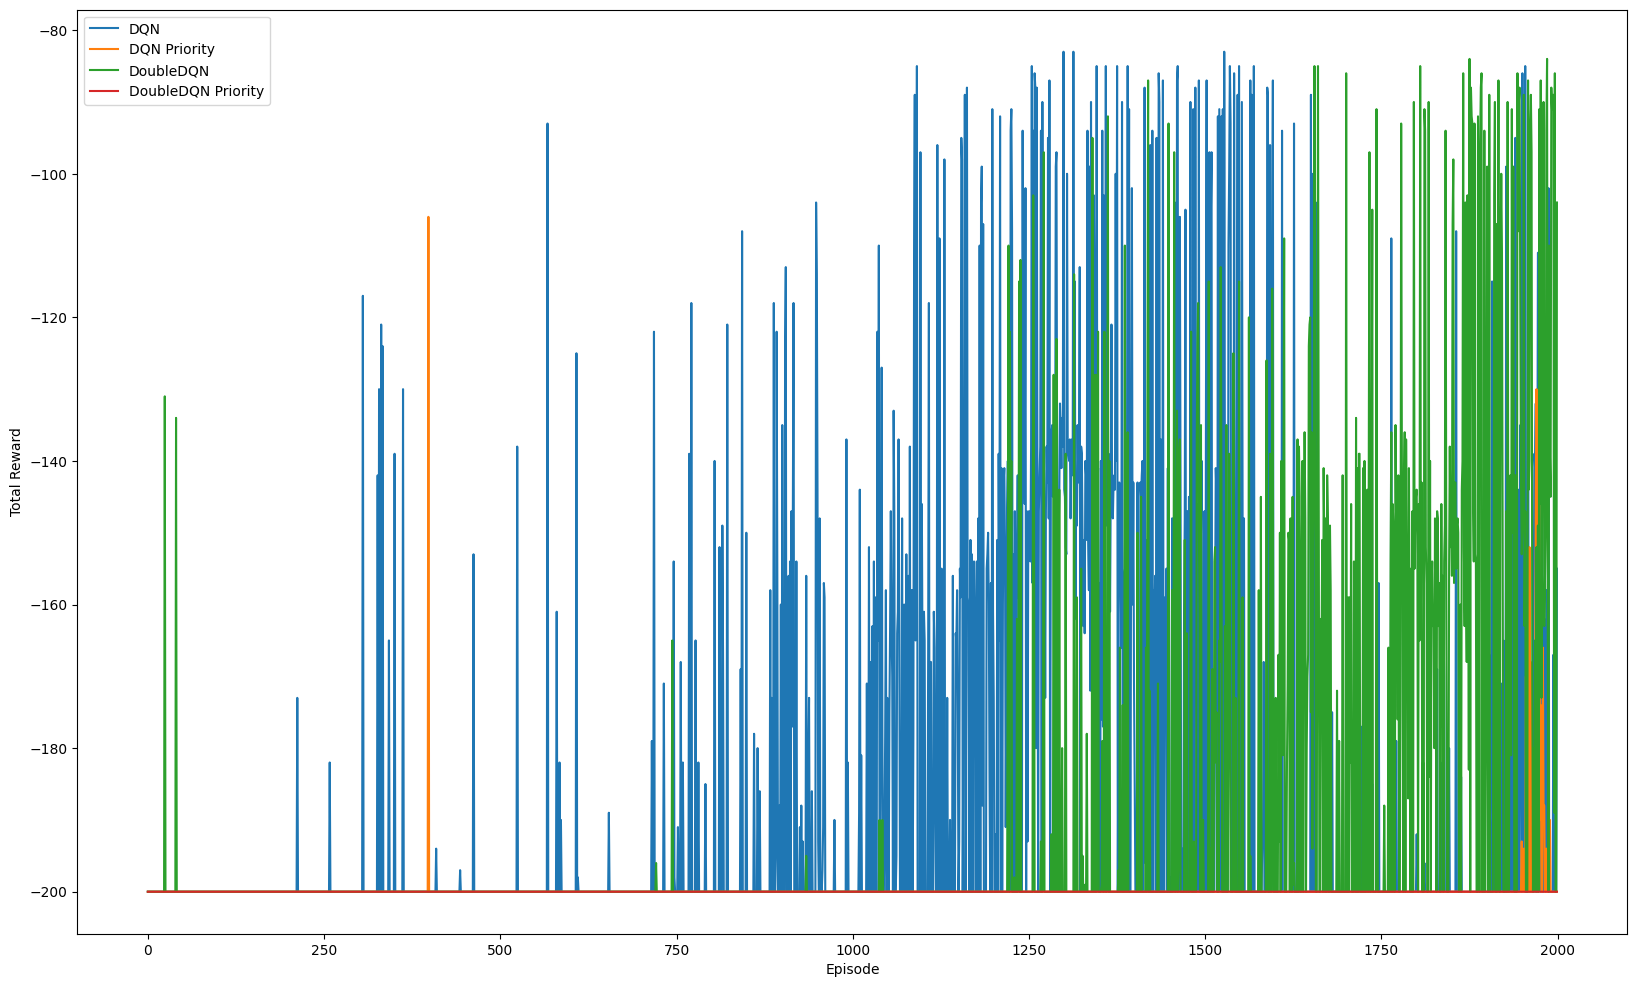

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.plot(dqn_rewards, label='DQN')
ax.plot(dqn_priority_rewards, label='DQN Priority')
ax.plot(ddqn_rewards, label='DoubleDQN')
ax.plot(ddqn_priority_rewards, label='DoubleDQN Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

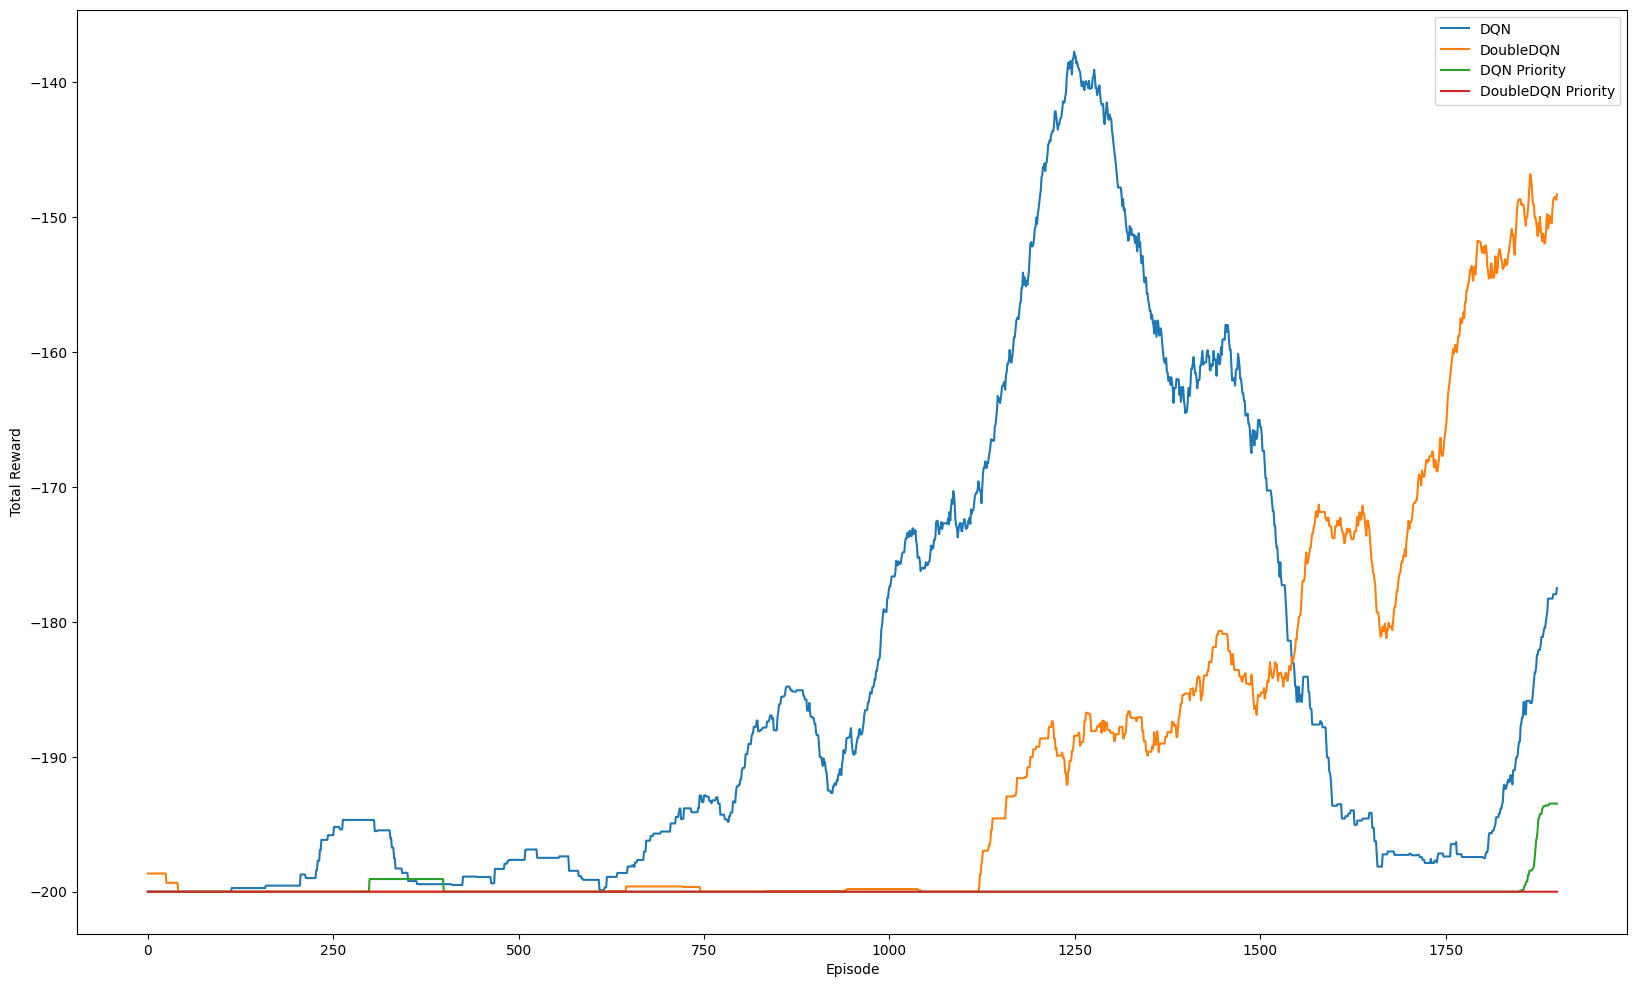

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.plot(moving_average(dqn_rewards), label='DQN')
ax.plot(moving_average(ddqn_rewards), label='DoubleDQN')
ax.plot(moving_average(dqn_priority_rewards), label='DQN Priority')
ax.plot(moving_average(ddqn_priority_rewards), label='DoubleDQN Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

In [ ]:
from IPython import display


def simulate_notebook(agent: DQNAgent, env: gym.Env, ax: plt.Axes) -> None:
    state, _ = env.reset()
    img = ax.imshow(env.render())
    done = False
    total_reward = 0
    steps = 0
    while not done:
        action = agent.act(state)
        img.set_data(env.render())
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        done = terminated or truncated
    env.close()
    print(f'Total reward: {total_reward}\tSteps: {steps}')

Total reward: -200.0	Steps: 200


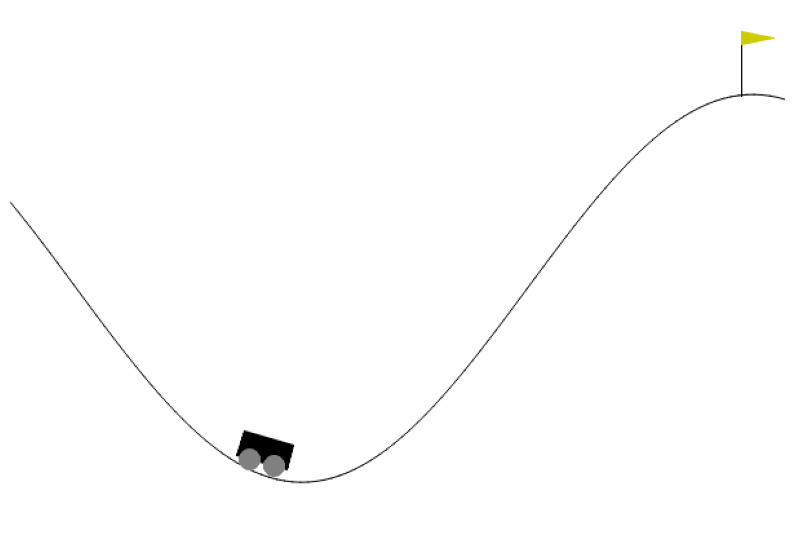

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(dqn_agent, env, ax)

Total reward: -200.0	Steps: 200


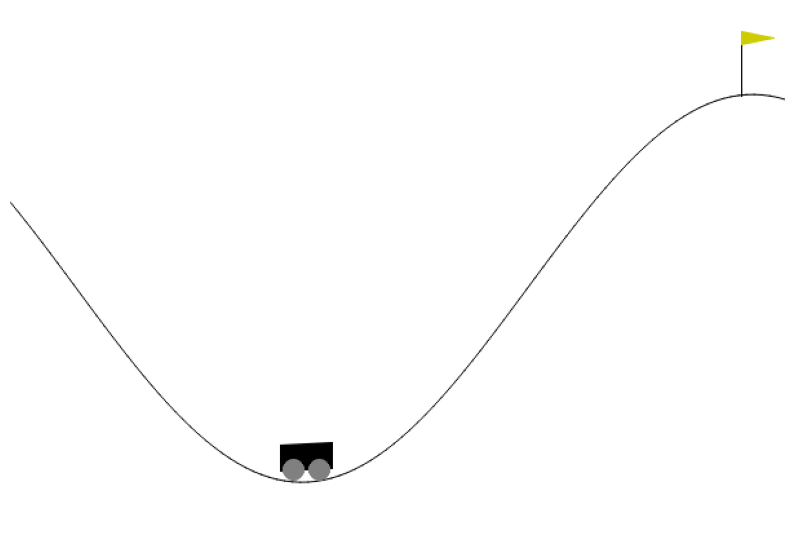

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(dqn_priority_agent, env, ax)

Total reward: -200.0	Steps: 200


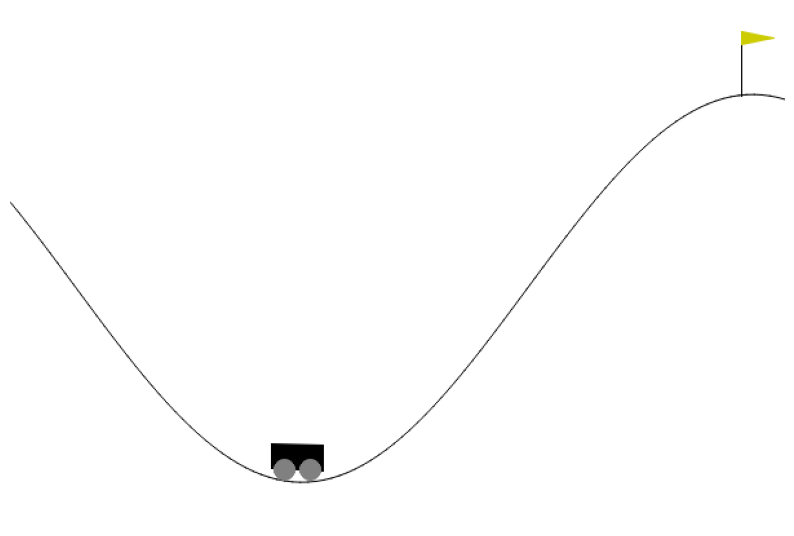

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(ddqn_priority_agent, env, ax)

Total reward: -200.0	Steps: 200


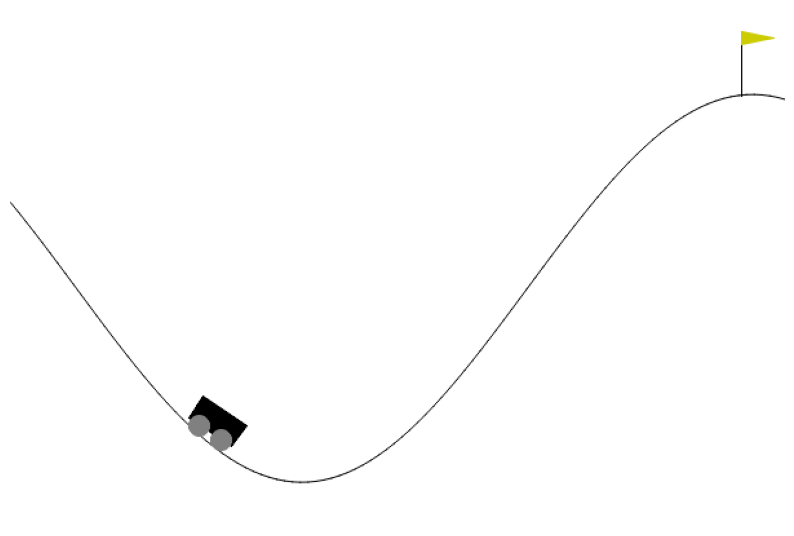

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(ddqn_agent, env, ax)